In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.datasets
import sklearn.svm
import sklearn.neural_network
import sklearn.model_selection
import sklearn.inspection
import seaborn
import numpy
import warnings
warnings.filterwarnings('ignore')

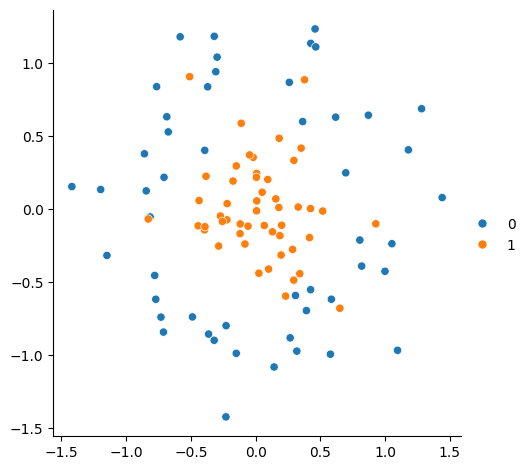

In [2]:
# Create a random dataset with two circles
x, y = sklearn.datasets.make_circles(n_samples = 100, noise = 0.25, factor = 0.25, random_state = 42)
seaborn.relplot(x = x[:, 0], y = x[:, 1], hue = y)

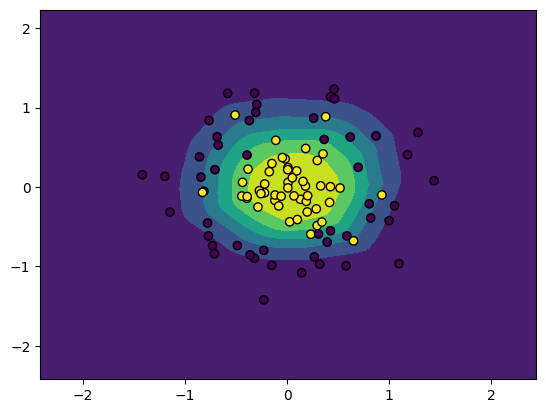

In [3]:
# Neural Network
nn = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = [20, 20])
nn.fit(x, y)
plot = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(nn, x, response_method = "predict_proba")
plot.ax_.scatter(x[:, 0], x[:, 1], c = y, edgecolor = "black")

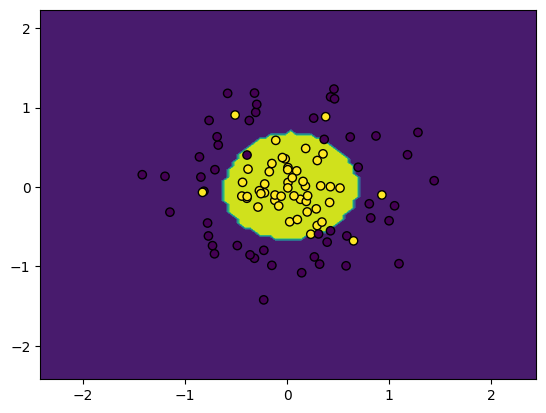

In [4]:
# Kernel SVM
svm = sklearn.svm.SVC(kernel = "rbf")
svm.fit(x, y)
plot = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(svm, x, response_method = "predict")
plot.ax_.scatter(x[:, 0], x[:, 1], c = y, edgecolor = "black")

In [5]:
# Directly compute accuracy (not the correct way)
y_pred_nn = nn.predict(x)
y_pred_svm = svm.predict(x)
print([sum(y_pred_nn == y), sum(y_pred_svm == y)])

[91, 94]


In [6]:
# Cross validation accuracy
acc_nn = numpy.average(sklearn.model_selection.cross_val_score(nn, x, y, cv = 5))
acc_svm = numpy.average(sklearn.model_selection.cross_val_score(svm, x, y, cv = 5))
print([acc_nn * 100, acc_svm * 100])

[86.00000000000001, 89.0]
